<a href="https://colab.research.google.com/github/AnujM09/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis_Anuj_Menaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **Step 1: Attribute Information**

## **1. Zomato Restaurant names and Metadata**
Use this dataset for clustering part


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings


## **2. Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part


1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **Business Problem Analysis**

The various regional and traditional foods that are indigenous to the Indian subcontinent make up Indian cuisine. You may discover something unique to adore in every state. Aside from the traditional foods of North and South India, many other civilizations have had a significant influence on and contributed to the development of culinary culture. It would be an understatement to say that Indians like eating. People in India like celebrating even the smallest milestones in their life with delicious food and a welcoming environment. Zomato is here to connect customers and restaurants. Zomato is an online directory of Indian restaurants that offers menus, user ratings, and the option of meal delivery. They essentially take orders on behalf of the restaurant and arrange for delivery of the meal to your door.


The problem statement here has two datasets for us to work on:

*   Zomato Restaurant Names and Metadata
*   Zomato Restaurant Reviews


Zomato must examine its datasets and make informed strategic decisions if it wants to ensure its success. In order to assist clients identify the finest restaurants in their city, according to their preferences, and to analyse the areas where they are falling short, the issue statement requests us to group the restaurants. This will aid Zomato in developing a strong consumer recommendation system. Use the restaurant prices and cuisines to do a cost-benefit analysis. It is crucial to do sentiment research to learn how customers truly feel about a certain restaurant in order to identify areas that require improvement. to locate the industry critics and, in particular, to work on their assessments in order to develop a reputation that is praiseworthy.




# **Step 2: Importing required Libraries & Dataset**

In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries and modules
import numpy as np
from numpy import unique
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)                                       # To Display all the columns present in the Data Frame

import datetime

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import re
import string
import spacy

!pip install contractions
import contractions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 24.9 MB/s 
     |████████████████████████████████| 110 kB 60.7 MB/s 


In [3]:
# Importing Datasets
meta_df = pd.read_csv('/content/drive/MyDrive/Zomato_Restaurant_Clustering_and_Sentiment_Analysis - Anuj Menaria/Zomato names and Metadata.csv')
rvw_df = pd.read_csv('/content/drive/MyDrive/Zomato_Restaurant_Clustering_and_Sentiment_Analysis - Anuj Menaria/Zomato reviews.csv')

# **Step 3: Insights of Data**

## **1. MetaData**

In [4]:
# Analyzing first top rows of the Dataset
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# Checking the Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


There are 6 columns and 105 rows. Thus, the number of restaurants available for study and modelling is just 105.

The categorized column "Collections," which is essentially just tags provided by Zomato for improved search results, has about 50% of the data missing.

In [6]:
# Shape of the dataset
meta_df.shape

(105, 6)

In [7]:
# Looking for Unique Values
meta_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

We can see, except Name and Links column, all other columns have unique values.

In [8]:
# Checking for Null Values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [9]:
# Checking for duplicates
meta_df.duplicated().sum()

0

In [10]:
# Analyzing all the columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

## **2. Reviews Data**

In [11]:
# Analyzing first top rows of the Dataset
rvw_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [12]:
# Shape of the dataset
rvw_df.shape

(10000, 7)

In [13]:
# Checking for the Unique Values
rvw_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [14]:
# Checking for Null Values
rvw_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [15]:
# Checking for duplicates
rvw_df.duplicated().sum()

36

In [16]:
# Analyzing all the columns
rvw_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [17]:
# Checking the Info
rvw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# **Step 4: Data Pre-Processing**

In [18]:
def remove_outlier(df,column):                                                  # Define a function to treat the outliers with respect to Columns of a Dataframe
  
  plt.figure(figsize=(15,5))                                                    # Giving size of the figure
  plt.subplot(1, 2, 1)                                                          # Giving Subplot 
  plt.title('Before Treating outliers')                                         # Giving Title of the figure Before treating Outliers
  sns.boxplot(df[column])                                                       # Passing the type of plot 
  plt.subplot(1, 2, 2)                                                          # Giving Another Sublpot
  sns.distplot(df[column])                                                      # Passing the type of plot 
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,5))
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')                                          # Giving Title of the figure Before treating Outliers
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

## **1. Metadata**

In [19]:
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')           # Changing the data type of the cost function

meta_df.drop(['Links','Timings'],axis=1,inplace=True)                           # Dropping Links and Timings Column. We are not getting any meaningful insights from columns.
     
meta_df.rename(columns={'Name':'Restaurant'},inplace=True)                      # Name and Restaurant columns are present in both of the data frames that we have. The Name column will be changed to the Restaurant column in accordance with the reviews dataset.

meta_df['Collections'].fillna('Unknown',inplace=True)                           # Replacing null values with Unknown

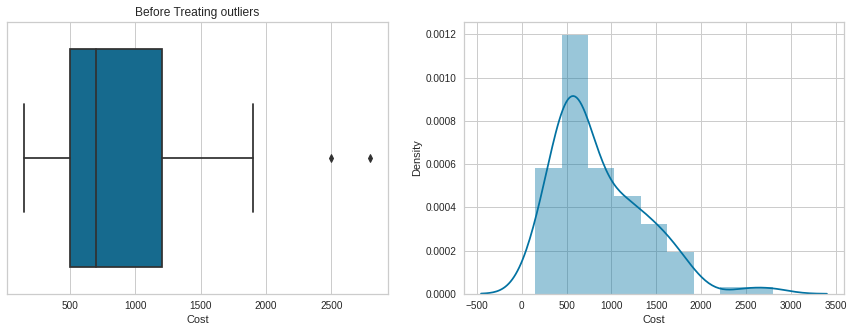

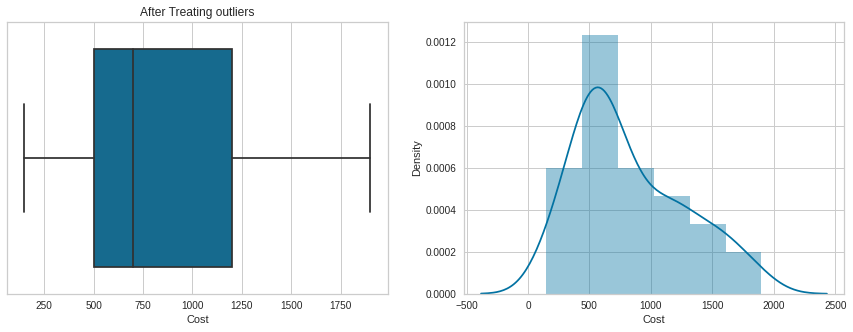

In [20]:
remove_outlier(meta_df,'Cost')                                                  # The outlier will be treated for numerical column and it will be according to the Z-score.

We can see Only Cost column above, because outliers will be treated for numerical columns only.

## **2. Reviews**

In [21]:
rvw_df['Rating'].value_counts()                                                 # Let's check which are those ten unique values and it's value count in the rating column

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [22]:
rvw_df['Rating'] = rvw_df['Rating'].replace('Like','4')                         # 'like' observation first by nan values ans then by mean of the feature 

rvw_df['Rating'] = rvw_df['Rating'].astype('float64')                           # Converting the datatype of 'Rating' Column.

print(rvw_df['Rating'].mean())                                                  # Checking the Mean of 'Rating' Column.

rvw_df['Rating'].fillna(3.5,inplace=True)                                       # We will assume mean as 3.5 because we can see in rating column every value is rounded off.

3.6010841196546877


In [23]:
rvw_df['Time'] = pd.to_datetime(rvw_df['Time'])                                 # Let's convert 'Time' column to DateTime

In [24]:
rvw_df.dropna(inplace=True)                                                     # Let's drop the missing values

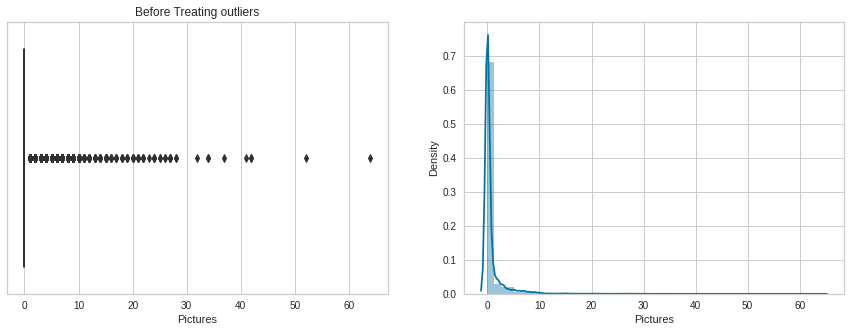

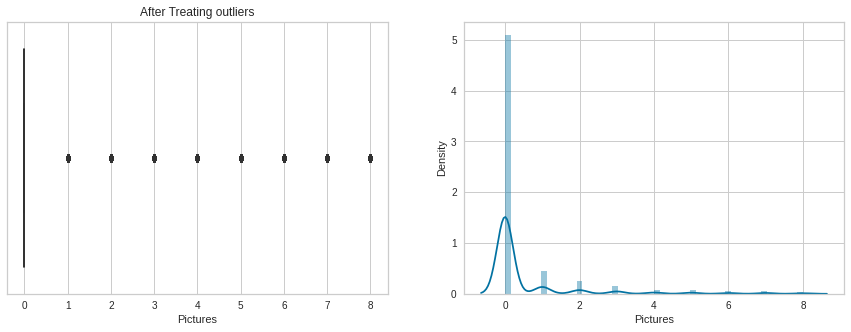

In [25]:
remove_outlier(rvw_df,'Pictures')                                               # Outlier treatment for Pictures column

# **Step 5: Data Cleaning**

## **1. Metadata**

Cuisines, collections, and restaurants all have string-type variables. Therefore, we attempt to apply NLP to the required columns for additional analysis. All restaurants' names are included in the restaurant column. For further investigation, we concentrate on the other 2 columns.

### **To remove Stopwords and Punctuation**

In [26]:
nltk.download('stopwords')                                                      # Downloading Stopwords with the help of nltk Library

sw = stopwords.words('english')                                                 # Creating a new Variable where all the English words are stored

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
meta_df['Collections'] = meta_df['Collections'].str.replace('[^\w\s]','')       # Removing punctuations

In [28]:
meta_df['Collections'] = meta_df['Collections'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (sw)]))                          # Removing stopwords

### **Count Vectorizer**

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [29]:
count_vectorizer = CountVectorizer()                                            # Creating a Count Vectorizer object

count_vectorizer.fit(meta_df['Collections'])                                    # Fit the Count Vectorizer using the text data

dictionary = count_vectorizer.vocabulary_.items()                               # Collect the Vocabulary items used in the Vectorizer

In [30]:
vocab = []                                                                      # List to store Vocab.
count = []                                                                      # List to store Count.

for key, value in dictionary:                                                   # Creating a loop to append values in a list 
  vocab.append(key)
  count.append(value)

vocab_bef_stem = pd.Series(count,  index = vocab)                               # Store the Count in pandas dataframe with Vocab as index

vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)                  # Sort the Dataframe

### **Stemming**

When a lemma is attached to suffixes, prefixes, or the roots of words, the word is reduced to its word stem. In plain English, stemming is the process of reducing a word to its root word or stem so that terms of the same sort are grouped together under a single stem. As an illustration, the terms care, cared, and caring all have the same root word.

In [31]:
stemmer = SnowballStemmer("english")                                            # Creating an object of Stemming Function.

def stemming(text):                                                             # Defining a Function for stemming
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     
meta_df['Collections'] = meta_df['Collections'].apply(stemming)                 # Applying the Stemming Function to the 'Collection' Column.

### **TF-IDF Vectorizer**

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [32]:
tfid_vectorizer = TfidfVectorizer()                                             # creating the object of TF-IDF Vectorizer

tfid_vectorizer.fit(meta_df['Collections'])                                     # Fitting the Vectorizer using the text data

dictionary = tfid_vectorizer.vocabulary_.items()                                # Collecting the vocabulary items in the dictionary used in the Vectorizer
     
vocab = []                                                                      # Lists to store the Vocab.
count = []                                                                      # Lists to store the Counts

for key, value in dictionary:                                                   # Creating a loop to append values in a list
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)                                # Store the count in panadas dataframe with vocab as index

vocab_after_stem = vocab_after_stem.sort_values(ascending=False)                # Sort the dataframe

We'll add a 'Collections length' column to Collections with a word count as its value.

In [33]:
def length(text):                                                               # Defining a function to count the words. 
  count = 0
  for i in range(len(text)):
    if text[i]==' ':
        count = count + 1
        
  return count+1
     
meta_df['Collections_length'] = meta_df['Collections'].apply(length)            # To count the Length from Collections column

## **Cuisines Count**

In [34]:
list_of_cuisins = meta_df.Cuisines.str.split(', ')                              # Splitting all the words in a row having a comma.

meta_df['Cuisines_list'] = pd.Series()

for i in range(len(meta_df)):                                                   # Creating a loop for length of number of dishes served by a restaurant.
  meta_df['Cuisines_list'][i] = list_of_cuisins[i]

meta_df['Total Cuisines'] = meta_df['Cuisines_list'].apply(lambda x : len(x))   # Creating a new column for the total number of cusines served by restaurant.

meta_df.drop(['Cuisines_list'],axis=1,inplace=True)                             # Dropping the column as it is not futher required

Restaurant items are divided into cuisines by commas. Therefore, Cuisines doesn't need to be cleaned. Therefore, we are counting the different cuisines that a restaurant serves.

## **2. Reviews Data**

In [35]:
rvw_df['no_of_Reviews'],rvw_df['no_of_Followers'] = rvw_df['Metadata'].str.split(',').str  # Metadata columns will be divided into two new columns as there are two types of info available.

rvw_df['no_of_Reviews'] = pd.to_numeric(
                          rvw_df['no_of_Reviews'].str.split(' ').str[0])        # Spliting the Data.
rvw_df['no_of_Reviews'] = rvw_df['no_of_Reviews'].astype('float64')             # Converting the Datatype to float.

rvw_df['no_of_Followers'] = pd.to_numeric(
                            rvw_df['no_of_Followers'].str.split(' ').str[1])    # Spliting the Data.
rvw_df['no_of_Followers'] = rvw_df['no_of_Followers'].astype('float64')         # Converting the Datatype to float.
     

rvw_df['Date'] = pd.DatetimeIndex(rvw_df['Time']).date                          # Extracting the Date from 'Time' column.
rvw_df['Hour'] = pd.DatetimeIndex(rvw_df['Time']).hour                          # Extracting the Hour from 'Time' column.
     

rvw_df['day'] = rvw_df['Date'].apply(lambda x: x.weekday())                     # Creating seperate column for day.
rvw_df['month'] = rvw_df['Date'].apply(lambda x: x.month)                       # Creating seperate column for month.
rvw_df['year'] = rvw_df['Date'].apply(lambda x: x.year)                         # Creating seperate column for  year.
    
# Weekdays                                                                      # Mapping weekdays with integers.
week_day = {0:'Monday', 
            1:'Tuesday', 
            2:'Wednesday', 
            3:'Thursday', 
            4:'Friday', 
            5:'Saturday', 
            6:'Sunday'}
rvw_df['day'] = rvw_df['day'].map(week_day)

# Months                                                                        # Mapping Months with integers.
month_dict = {1:'Jan', 2:'Feb', 3:'March', 
              4:'April', 5:'May', 6:'June', 
              7:'July', 8:'Aug', 9:'Sep', 
              10:'Oct', 11:'Nov', 12:'Dec'}
rvw_df['month'] = rvw_df['month'].map(month_dict)
     
rvw_df = rvw_df.drop(['Metadata'], axis = 1)                                    # Dropping Unwanted column.
rvw_df = rvw_df.drop(['Time'], axis = 1)                                        # Dropping Unwanted column.

# **Step 6: Exploratory Data Analysis**

Data analysis must include exploratory data analysis. It entails examining and analyzing the provided dataset to uncover trends, patterns, and conclusions to help users make better decisions regarding the data. The results are frequently summarized using statistical graphics and other tools for data visualization. To study the data, Python modules like pandas are utilized, while matplotlib and seaborn are used to show it.

### **Top 10 Most Expensive Restaurants**

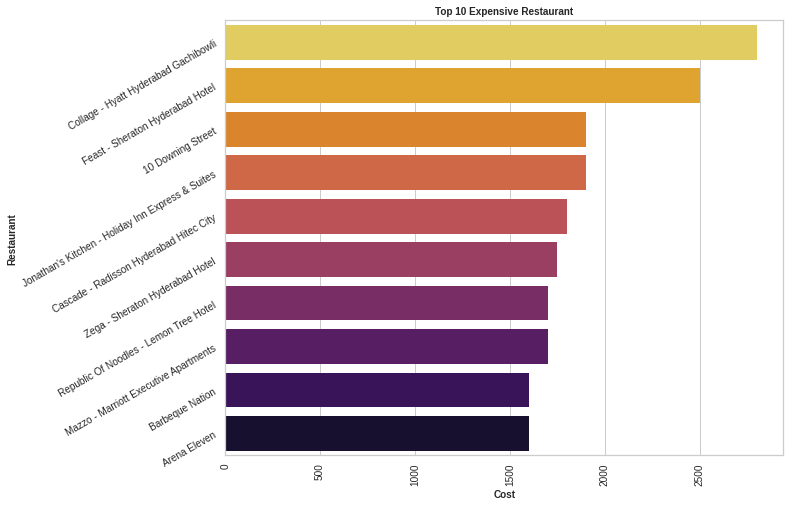

In [36]:
top_rest_by_cost = meta_df[
    ['Restaurant',
     'Cost']].groupby(
         'Restaurant',
         as_index=False).sum().sort_values(
             by='Cost',ascending=False).head(10)                                # Creating a Variable for top 10 Expensive Restaurant.

plt.figure(figsize = (10,8))                                                    # Figure Size.
plt.title("Top 10 Expensive Restaurant", fontsize=10, weight='bold')            # Giving Title to Figure.
plt.ylabel("Restaurant", weight='bold', fontsize=10)                            # Giving name on Y-axis.
plt.xlabel("Cost", weight='bold', fontsize=10)                                  # Giving name on X-axis.
plt.xticks(rotation=90)                                                         # Rotating names on X-axis.
plt.yticks(rotation=30)                                                         # Rotating names on Y-axis.
sns.barplot(x = top_rest_by_cost['Cost'], 
            y = top_rest_by_cost['Restaurant'], 
            palette='inferno_r')                                                # Plotting a Bargraph using Seaborn Library.
plt.show()

### **Top 10 Most Affordable Restaurants**

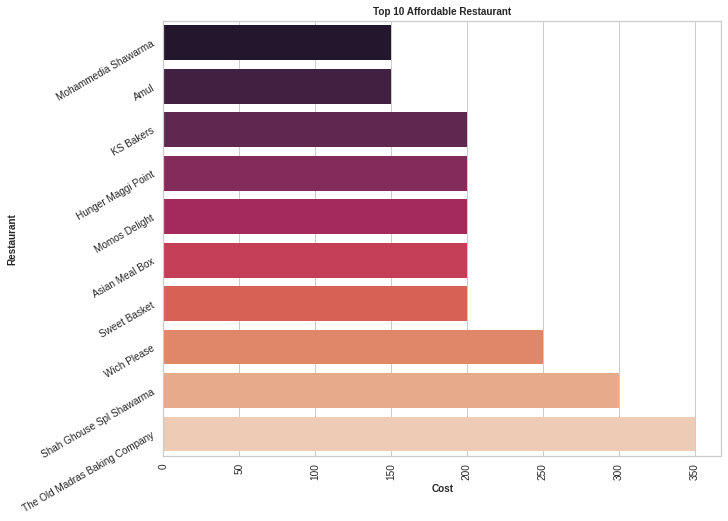

In [37]:
top_affor_rest = meta_df[
    ['Restaurant',
     'Cost']].groupby(
         'Restaurant', 
          as_index=False).sum().sort_values(
              by ='Cost',ascending = False).tail(10)                            # Creating a Variable for top 10 Affordable Restaurant.

plt.figure(figsize = (10,8))                                                    # Figure Size.
plt.title("Top 10 Affordable Restaurant", fontsize = 10, weight='bold')         # Giving Title to Figure.
plt.ylabel("Restaurant", weight = 'bold', fontsize = 10)                        # Giving name on Y-axis.
plt.xlabel("Cost", weight = 'bold', fontsize = 10)                              # Giving name on X-axis.
plt.xticks(rotation = 90)                                                       # Rotating names on X-axis.
plt.yticks(rotation = 30)                                                       # Rotating names on Y-axis.
sns.barplot(x = top_affor_rest['Cost'], 
            y = top_affor_rest['Restaurant'][::-1],
            palette = 'rocket')                                                 # Plotting a Bargraph using Seaborn Library.
plt.show()

### **Top 10 Rated Restaurants**

Text(0.5, 1.0, 'Top Rated 10 Restaurants')

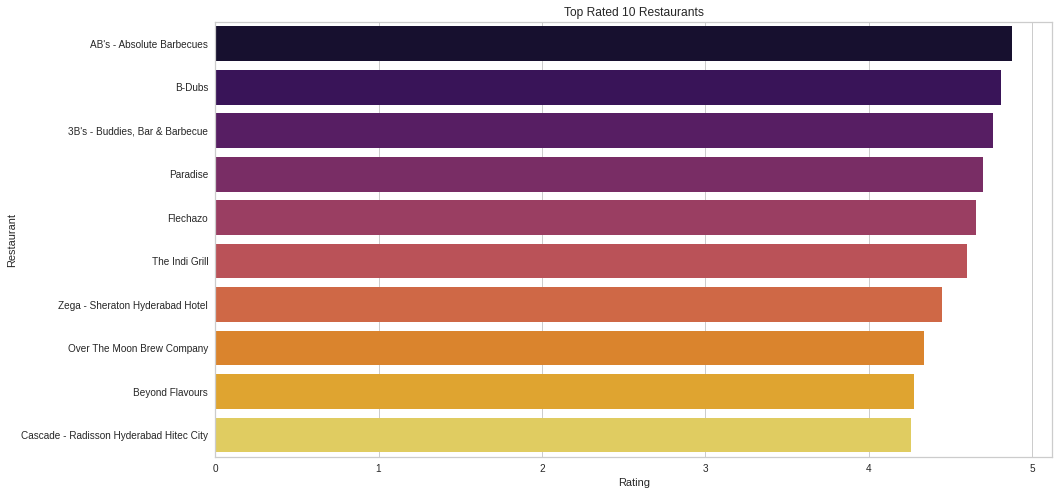

In [38]:
rvw_df = rvw_df[rvw_df['Rating'] != 'Like']                                     # Removing any Non Number from the 'Rating' Column.

rvw_df['Rating'] = rvw_df['Rating'].astype('float64')                           # Converting 'Rating' Column datatype to 'float'

df_rate = rvw_df.groupby(
    ['Restaurant'])[
        'Rating'].mean().sort_values(ascending = False).reset_index().head(10)  # Grouping by 'Restaurant' column

df_rate = df_rate.sort_values(by = 'Rating', ascending = False).head(10)        # Sorting the data by 'Ratinf'

plt.figure(figsize = (15,8))                                                    # Figure Size.
sns.barplot(data = df_rate, x = 'Rating', y = 'Restaurant', palette = 'inferno')# Plotting a Bargraph using Seaborn Library.
plt.title('Top Rated 10 Restaurants')                                           # Giving Title to Figure.

### **Cuisines offered by Restaurants**

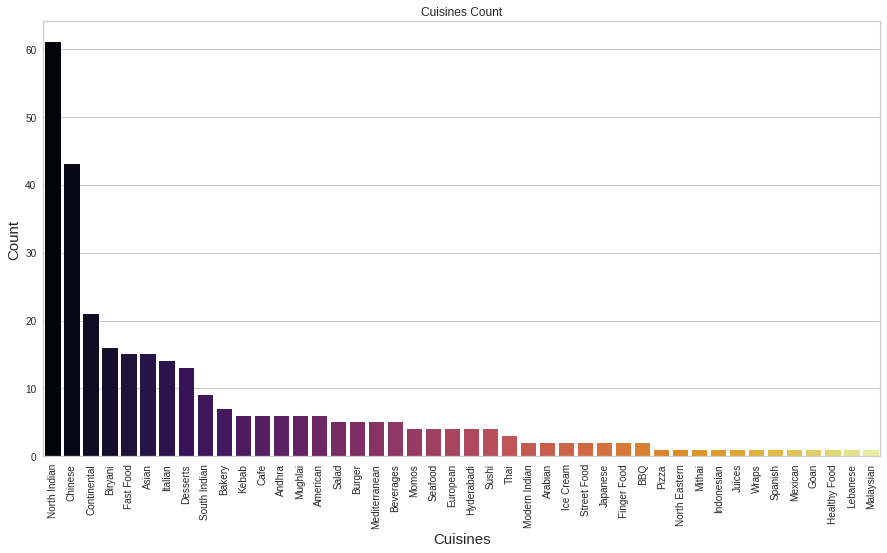

In [39]:
cuisine_list = meta_df.Cuisines.str.split(', ')                                 # Spliting the 'Cuisines' column's data on comma. 

clusterlist = {}                                                                # Empty Dictionary to store data

for names in cuisine_list:                                                      # Creating a loop 
    for name in names:
      if (name in clusterlist):
        clusterlist[name]+=1
      else:
         clusterlist[name]=1

cuis = pd.DataFrame(clusterlist.values(),
                    index = clusterlist.keys(),
                    columns = {'Cuisine Count'}).reset_index()                  # Creating a cuis dataframe

cuis.sort_values(by = 'Cuisine Count',ascending = False,inplace = True)         # Sorting the dataframe in descending order
     
plt.figure(figsize = (15, 8))                                                   # Figure Size
sns.barplot(data = cuis,
            x = cuis['index'], 
            y = cuis['Cuisine Count'],
            palette='inferno')                                                  # Plotting a Bargraph using  seaborn Library.
plt.title('Cuisines Count')                                                     # Giving Title name
plt.xlabel('Cuisines', fontsize = 15)                                           # Giving name to X-axis
plt.ylabel('Count', fontsize = 15)                                              # Giving name to Y-axis
plt.xticks(rotation = 90, fontsize = 10)                                        # Rotating names on X-axis
plt.yticks(fontsize = 10)                                                       # Rotating names on Y-axis
plt.show()     

We can observe that 'North indian' is the Popular Cuisine which is offered by almost many resturants. And 'Malaysian' is the rare cuisine.

### **Distribution of Restaurants by Rating**

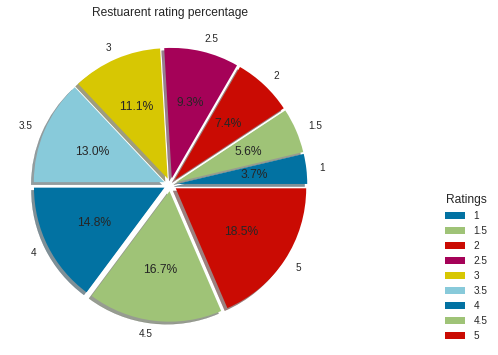

In [40]:
y = np.unique(rvw_df['Rating'])                                                 # Creating a variable for unique values
mylabels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]                                  # labeling the data

plt.figure(figsize=(8,6))                                                       # Figure size
plt.pie(y, 
        labels = mylabels,
        autopct = '%1.1f%%',
        explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),
        shadow = True)                                                          # Plotting a Piechart using Matplotlib Library
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5))
plt.title("Restuarent rating percentage")                                       # Giving Title
plt.show()

### **Wordcloud for Rating**

In [41]:
rvw_eda = rvw_df.copy()                                                         # Copying the DataFrame

def sentiment_rating(rating):                                                   # Defining a Function for 'Rating'
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

rvw_eda["rating_classification"] = rvw_eda["Rating"].apply(sentiment_rating)    # Applying above function

good = rvw_eda.loc[rvw_eda['rating_classification']==1,'Review']
bad = rvw_eda.loc[rvw_eda['rating_classification']==0,'Review']
average = rvw_eda.loc[rvw_eda['rating_classification']==0.5,'Review']
     
text1 = " ".join(good)
text2 = " ".join(bad)
text3 = " ".join(average)

word_cloud1 = WordCloud(min_font_size = 3,  
                        max_words = 3000, 
                        width = 1600, 
                        height = 800,
                        collocations = False,
                        background_color = 'white').generate(text1)             # Creating WordCloud For Most Frequent words used.
word_cloud2 = WordCloud(min_font_size = 3,
                        max_words = 3000,
                        width = 1600,
                        height = 800,
                        collocations = False,
                        background_color = 'black').generate(text2)
word_cloud3 = WordCloud(min_font_size = 3,
                        max_words = 3000,
                        width = 1600,
                        height = 800,
                        collocations = False,
                        background_color = 'pink').generate(text3)

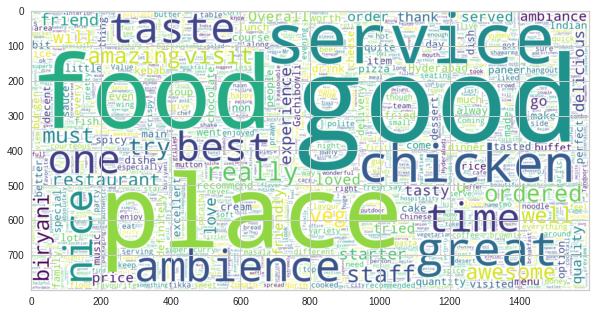

In [42]:
plt.figure(figsize = (10,12)) 
plt.imshow(word_cloud1,interpolation = 'bilinear')
plt.show()

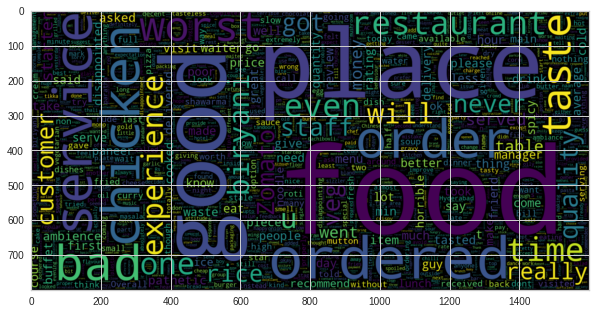

In [43]:
plt.figure(figsize = (10,12)) 
plt.imshow(word_cloud2,interpolation = 'bilinear')
plt.show()

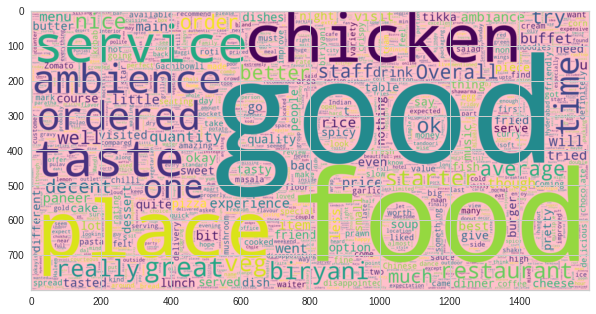

In [44]:
plt.figure(figsize = (10,12)) 
plt.imshow(word_cloud3,interpolation = 'bilinear')
plt.show()

### **Reviews on the basis of Time**

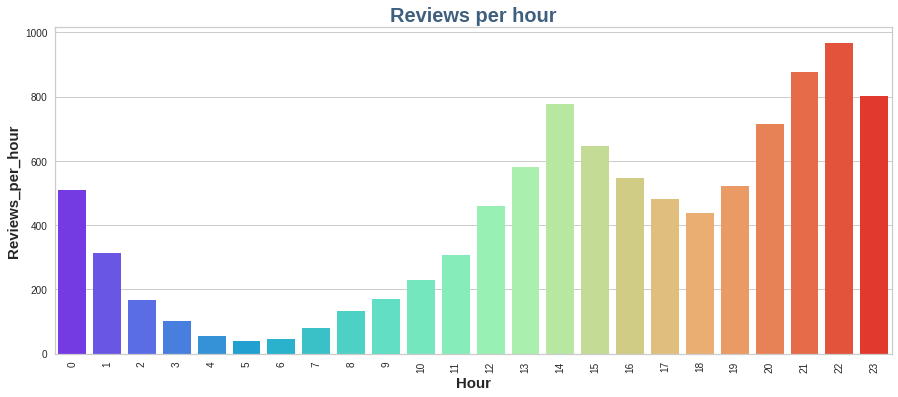

In [45]:
rvw_hour = rvw_df.groupby(
    'Hour').apply(lambda x: x[
        'Hour'].count()).reset_index(name = 'Reviews_per_hour')                 # Creating a variable for per hour
    
plt.figure(figsize=(15,6))
x = rvw_hour['Hour']
y = rvw_hour['Reviews_per_hour']
plt.title("Reviews per hour",
          fontsize=20,
          weight='bold',
          color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

# **Step 7: Feature Engineering**

In [46]:
# let's check dataframe
meta_df.head()

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2,3
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4
3,Shah Ghouse Hotel & Restaurant,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3,5
4,Over The Moon Brew Company,1200,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13,5


In [47]:
#let's check dataframe
rvw_df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_Reviews,no_of_Followers,Date,Hour,day,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3.0,2.0,2019-05-24,21,Friday,May,2019


Here, we have two data frames. one for sentiment analysis and the other for clustering. In order to cluster the data, we try to take into account the metadata data frame and extract some relevant data from the other reviews data frame about the restaurants, such as "Rating," "Number of followers," and "Number of Reviews."

### **Extracting Rating**

In [48]:
top_rest_rating = rvw_df.groupby([
    'Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()  # Creating a variable for top restaurant rating

In [49]:
top_rest_rating

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.880
1,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
3,Paradise,4.700
4,Flechazo,4.660
...,...,...
95,Behrouz Biryani,2.825
96,Mathura Vilas,2.820
97,Pakwaan Grand,2.710
98,Asian Meal Box,2.580


In [50]:
meta_df = meta_df.merge(top_rest_rating,on = 'Restaurant', how = 'left')        # Merging top_rest_rating to the meta_df Dataframe

meta_df.rename(columns={'Rating':'Avg_Rating'},inplace=True)                    # Renamimg the 'Rating' Column

### **Extracting 'number of reviews' and 'number of followers'**

In [51]:
Tot_flwr = pd.DataFrame(rvw_df.groupby([
    'Restaurant'])['no_of_Followers'].sum().reset_index())                      # Grouping by 'Restaurant'
Tot_rvws = pd.DataFrame(rvw_df.groupby([
    'Restaurant'])['no_of_Reviews'].sum().reset_index())
     

meta_df = meta_df.merge(Tot_rvws,on='Restaurant',how='left')                    # Merging columns
meta_df = meta_df.merge(Tot_flwr,on='Restaurant',how='left')

We now consider the two dataframes from here as one which contains only string variables and other with numeric variables.

In [52]:
cat_df = meta_df[['Restaurant','Collections','Cuisines']]                       # Creating a new Variable of all the Categorical columns in meta_df Dataframe.

In [53]:
num_df = meta_df[['Cost',
                  'Collections_length',
                  'Total Cuisines',
                  'Avg_Rating',
                  'no_of_Reviews',
                  'no_of_Followers']]                                           # Creating a new Variable of all the Numerical columns in meta_df Dataframe.

num_df.sort_values(by=['Cost','Avg_Rating'],
                   ascending=[False,False],
                   inplace=True,
                   ignore_index=True)                                           # Sorting on Cost and then Avg_rating

In [54]:
imputer = KNNImputer()                                                          # Defining imputer objects

num_df['Avg_Rating'] = imputer.fit_transform((num_df[
    'Avg_Rating'].values.reshape(-1,1)))
num_df['no_of_Reviews'] = imputer.fit_transform((num_df[
    'no_of_Reviews'].values.reshape(-1,1)))
num_df['no_of_Followers'] = imputer.fit_transform((num_df[
    'no_of_Followers'].values.reshape(-1,1)))                                   # Imputing missing values with KNN if any

In [55]:
# Checking for null Values
num_df.isna().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
Avg_Rating            0
no_of_Reviews         0
no_of_Followers       0
dtype: int64

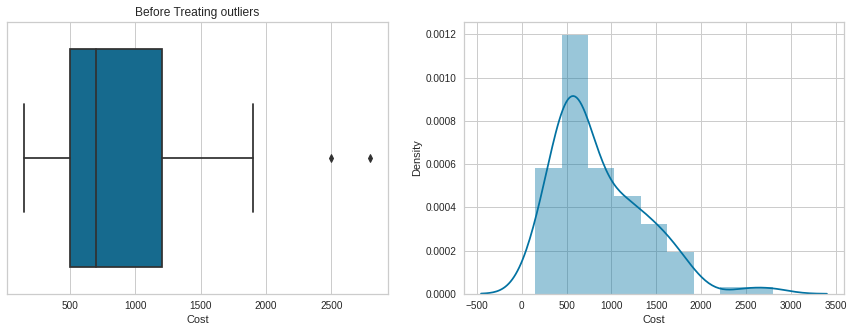

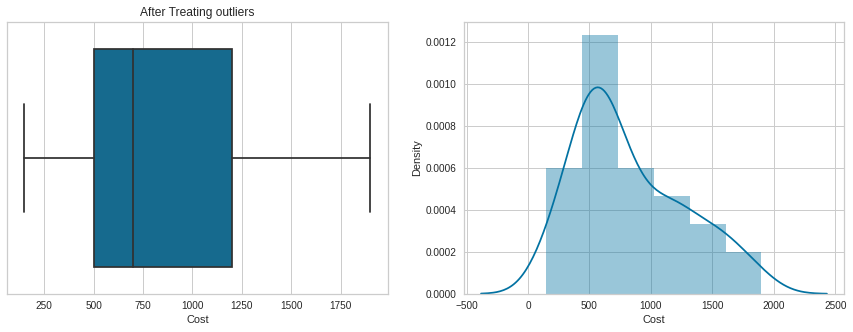

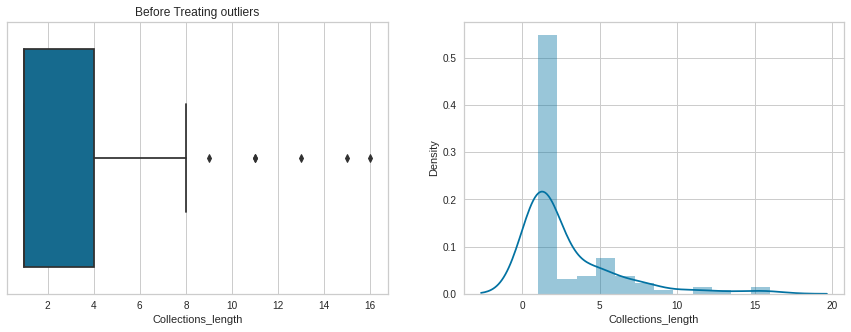

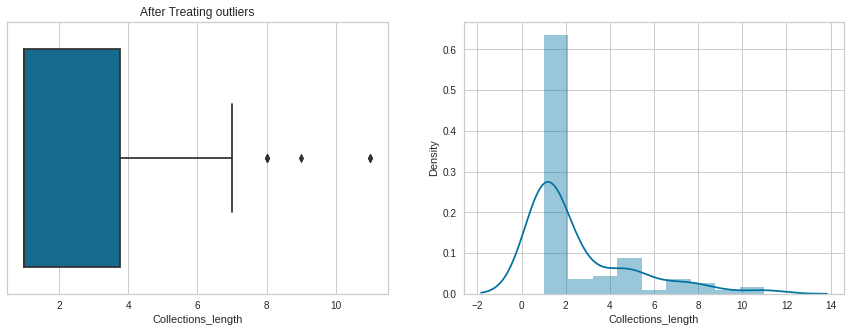

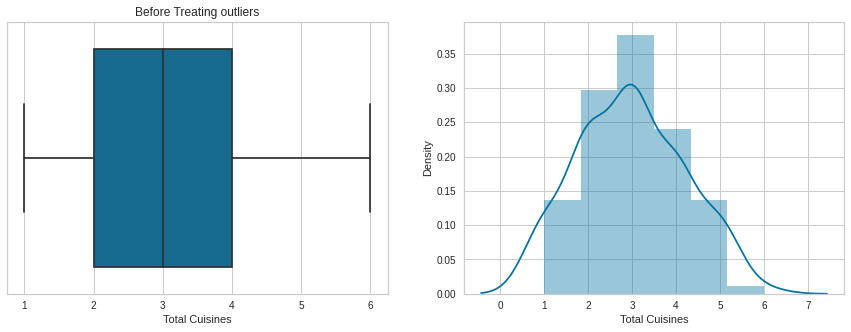

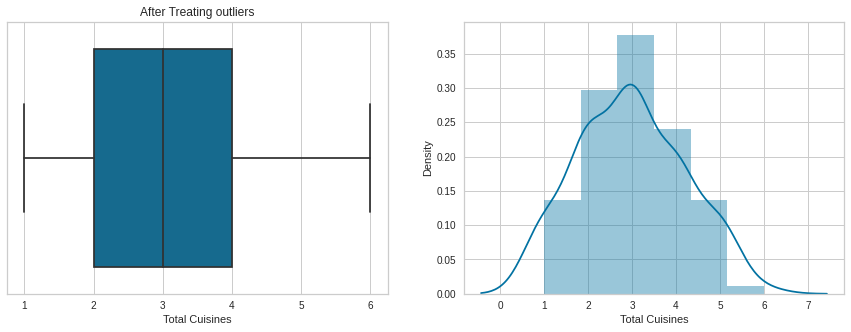

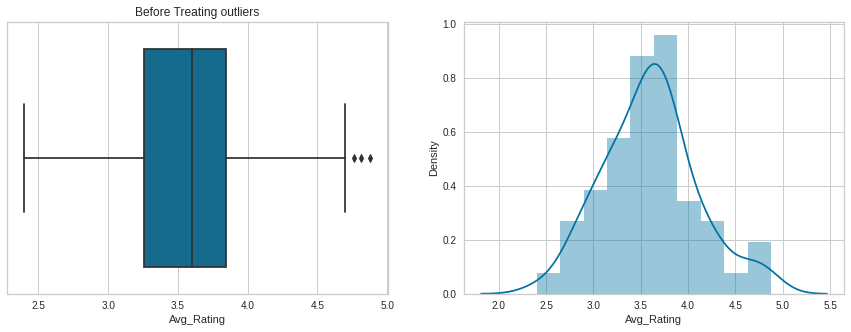

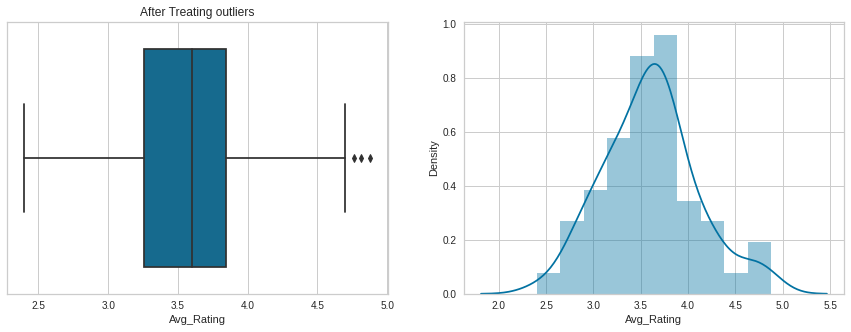

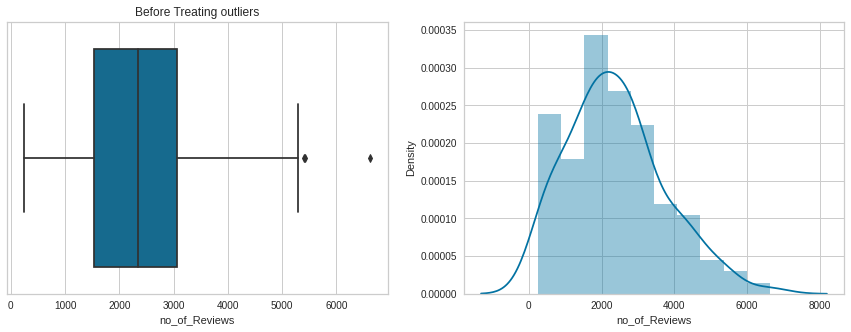

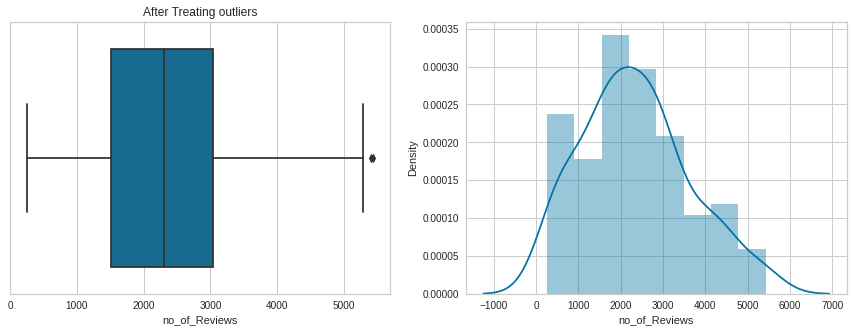

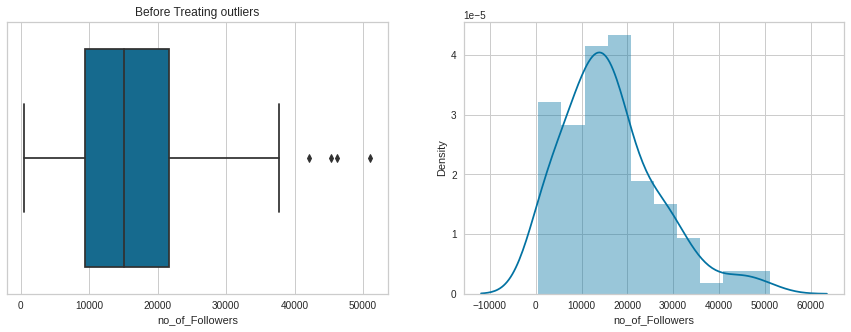

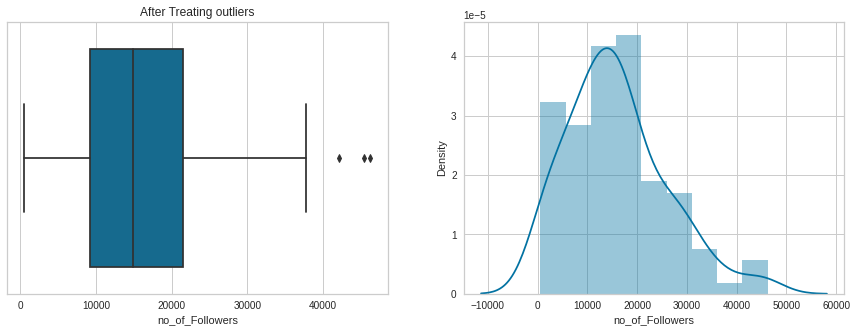

In [56]:
for i in num_df.columns:
  remove_outlier(num_df,i)                                                      # Removing outliers in Numercal Variable if there are any.

### **One Hot Encoding**

In [57]:
list_of_cuisins = meta_df.Cuisines.str.split(', ')                              # Splitting on comma 

diff_cuisines = {}              

for names in list_of_cuisins:                                                    # Creating a loop  
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 

cuisines_df = pd.DataFrame(diff_cuisines.values(),
                           diff_cuisines.keys(),
                           columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',
                        ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name',
                            'cuisines_name':'cuisines_counts'},inplace=True)
cuisines_df.head(5)

,cuisines_name,cuisines_counts
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [58]:
num_df = pd.concat([num_df,pd.DataFrame(columns=list(diff_cuisines.keys()))])

In [59]:
for i, row in num_df.iterrows():                                                # Creating a loop for every row in the dataframe
  for column in list(num_df.columns):
      if column not in ['Cost',
                        'Collections_length',
                        'Total Cuisines',
                        'Avg Rating',
                        'no_of_Reviews',
                        'no_of_Followers']:
        if column in cat_df['Cuisines']:
          num_df.loc[i,column] = 1
        else:
          num_df.loc[i,column] = 0

### **Feature Scaling**

In [60]:
column_names = list(num_df.columns)                                             # Creating a list of Numerical columns

scaled_df = pd.DataFrame()                                                      # Creating a new variable dataframe for scaled data frame

scaler = MinMaxScaler()                                                         # Creating object for MinMaxScaling                                         

scaled_df = pd.DataFrame(scaler.fit_transform(num_df))                          # Scaling the dataframe

scaled_df.columns = column_names

In [61]:
scaled_df

,Cost,Collections_length,Total Cuisines,Avg_Rating,no_of_Reviews,no_of_Followers,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,Desserts,Seafood,Beverages,Goan,Healthy Food,Lebanese,American,Ice Cream,Street Food,Fast Food,BBQ,Italian,Finger Food,Burger,Japanese,Salad,Sushi,Mexican,Mughlai,Andhra,Bakery,Juices,Arabian,Hyderabadi,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,1.000000,0.066667,0.8,0.0,0.707654,0.341821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.886792,0.466667,0.6,0.0,0.327635,0.337247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.660377,0.133333,0.4,0.0,0.586261,0.475409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.660377,0.200000,0.8,0.0,0.419542,0.523364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.622642,0.000000,0.6,0.0,0.657465,0.615412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.018868,0.000000,0.0,0.0,0.245138,0.202451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.018868,0.000000,0.0,0.0,0.289994,0.180434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.018868,0.000000,0.2,0.0,0.335300,0.310367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.000000,0.000000,0.2,0.0,0.199812,0.127628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Step 8: Clustering**

## **K-Means Clustering**

K-Means The most well-known clustering technique, clustering, involves grouping instances in an effort to reduce variation within each cluster.
The "n clusters" hyperparameter, which should be set to the estimated number of clusters in the data, is the key setting to adjust. It is implemented using the KMeans class.

In [62]:
features_cluster=['Collections_length','Total Cuisines']

X = scaled_df[features_cluster]

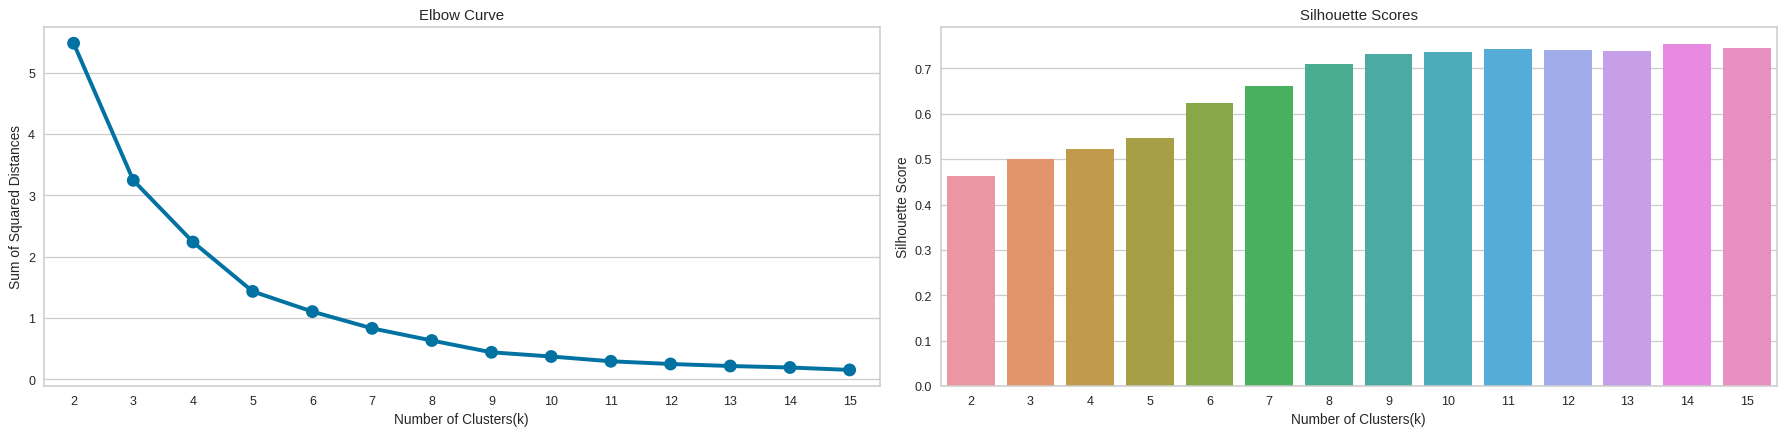

In [63]:
ssd,score = [],[]                                                               # Storing sum of squared distances and Silhouette Scores

plt.figure(figsize=(20,5), dpi=90)                                              # Setting figure Size

n_clusters = list(range(2,16))                                                  # Initializing the list of clusters for tuning the best clusters


for k in n_clusters:                                                            # Running a for loop of Kmeans algorithm
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()


Observations:

*   The number of clusters may be thought of as 5, which looks to be at the elbow from the elbow curve. Depending on the segmentation goal, n clusters=4 or 6 can also be taken into consideration.
*   The best number of clusters may be determined if we use the greatest Silhouette Score as the criterion (n clusters=10).
*   The intersection of the set of excellent n clusters obtained from both graphs may be used to determine the ideal number of clusters if we examine both graphs simultaneously. Since 6 is close to the elbow of the elbow curve and has a respectable Silhouette score, it seems like a good decision.





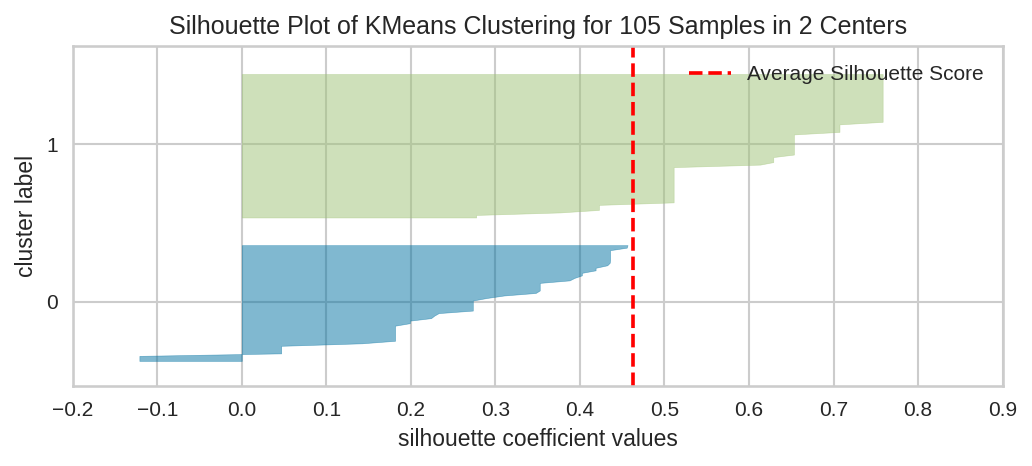

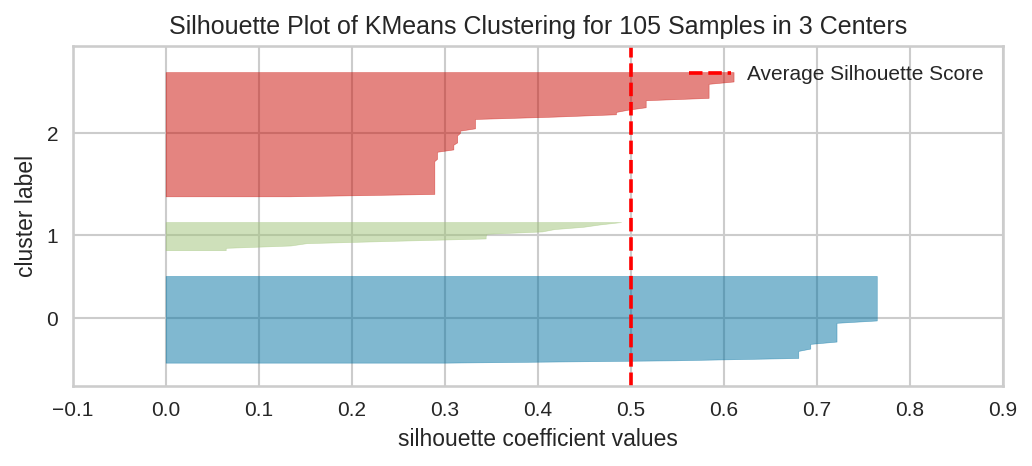

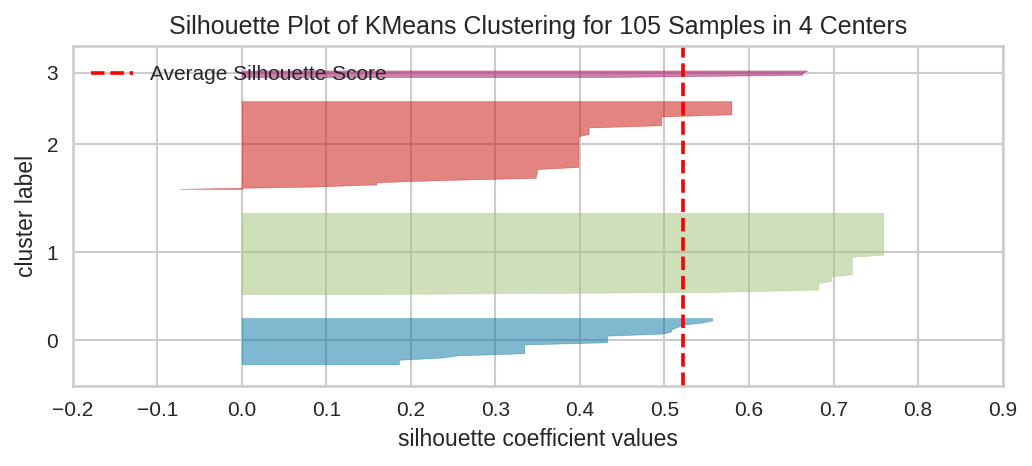

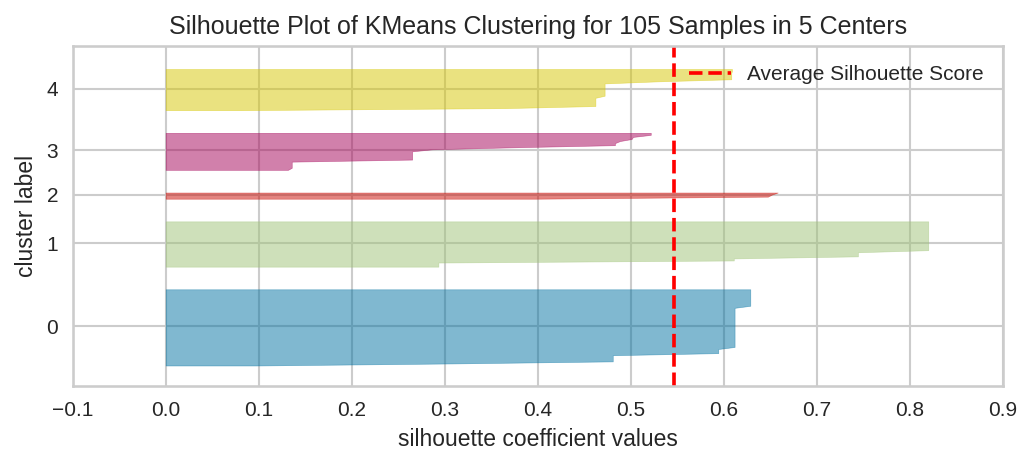

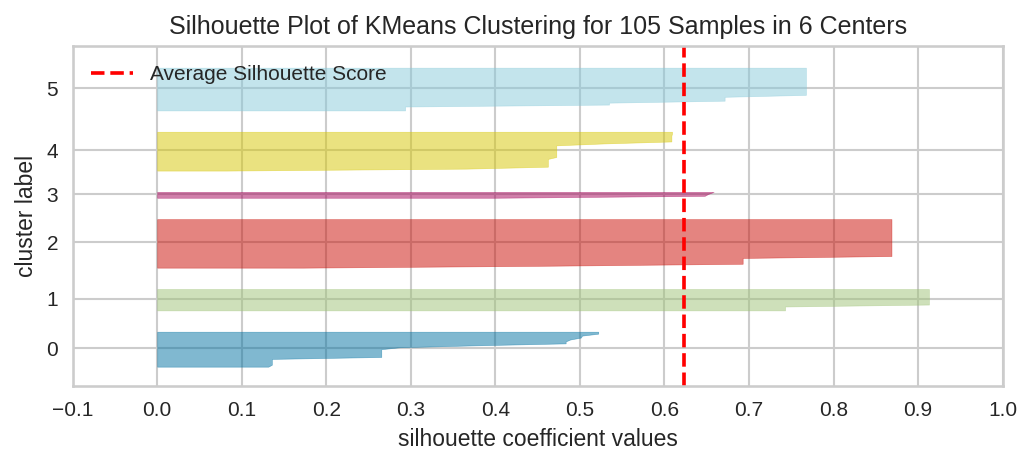

In [64]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

In [65]:
new_df = scaled_df.copy()                                                       
new_df.pop('Cost')
new_df.insert(3,'Cost',scaled_df['Cost'])

scaled_df = new_df.copy()

In [66]:
#Dataframe for Silhouette score
Y_predicted_clusters = scaled_df.copy()
silhouette_scores_df = pd.DataFrame(columns = ['Model','Optimal_clusters','Silhouette_score'])

In [67]:
for i in range(4,0,-1):
  features = scaled_df.columns[:-i]
  #print(features)
  X = scaled_df[features]
  # define the model
  model = AffinityPropagation(damping=0.9)
  # fit the model
  model.fit(X)
  # assign a cluster to each example
  yhat = model.predict(X)
  clusters = unique(yhat)
  score = silhouette_score(X, yhat)
  #print(score,clusters)
  #Y_predicted_clusters["Label_AffPr"] = yhat


In [68]:
Y_predicted_clusters["Label_AffPr"] = yhat

dict_values = {'Model':'Affinity Propagation','Optimal_clusters':len(clusters),'Silhouette_score':score}
silhouette_scores_df = silhouette_scores_df.append(dict_values,ignore_index=True)

In [69]:
silhouette_scores_df

,Model,Optimal_clusters,Silhouette_score
0,Affinity Propagation,14,0.23609


## **Hierarchical Clustering**

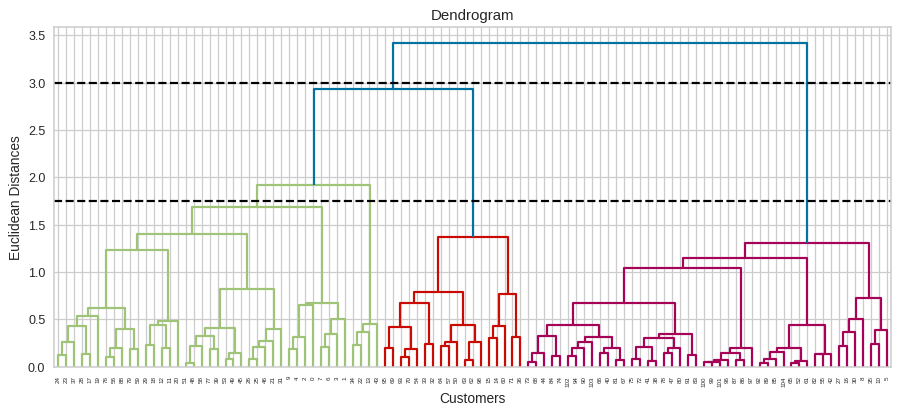

In [70]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(12,5), dpi = 90)   # Setting the figure size
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),orientation='top', 
            distance_sort='descending',
            show_leaf_counts=True) # using ward linkage method to differ similarities

plt.title('Dendrogram')# Setting the title
plt.xlabel('Customers')  # Setting the x label
plt.ylabel('Euclidean Distances')# Setting y label

plt.axhline(y=1.75, color='black', linestyle='--')            # Setting the axis line for y=1.75
plt.axhline(y=3.0, color='black', linestyle='--')            # Setting the axis line for y=3.0

plt.show() # find largest vertical distance we can make without crossing any other horizontal line


Observation:

*   We can erect a horizontal line and a threshold distance (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). This threshold can be placed at 3.0 or 1.75, and a horizontal line can be drawn as in the dendogram above.
*   The amount of vertical lines that the line produced using the threshold intersects will determine how many clusters there are. Two clusters are produced by the bigger threshold (y=1.75) and three clusters are produced by the lower threshold (y=3.0).



In [71]:
#Checking the Silhouette score for 15 clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    score = silhouette_score(X, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.22693436493358682
For n_clusters = 3, silhouette score is 0.2694184635731299
For n_clusters = 4, silhouette score is 0.2722676973507183
For n_clusters = 5, silhouette score is 0.2608190773351178
For n_clusters = 6, silhouette score is 0.24942463935680736
For n_clusters = 7, silhouette score is 0.24850794028785925
For n_clusters = 8, silhouette score is 0.2572493539191138
For n_clusters = 9, silhouette score is 0.28038910207811696
For n_clusters = 10, silhouette score is 0.2587960598515499
For n_clusters = 11, silhouette score is 0.27419923552617276
For n_clusters = 12, silhouette score is 0.262201350173048
For n_clusters = 13, silhouette score is 0.2601244334539194
For n_clusters = 14, silhouette score is 0.270268550470091
For n_clusters = 15, silhouette score is 0.27821114672356906


In [72]:
n_clusters = 7

#fit predict kmeans on  clusters
hc = AgglomerativeClustering(n_clusters = 7,
                             affinity = 'euclidean',
                             linkage = 'ward')
y_hc = hc.fit_predict(X)
score = silhouette_score(X, y_hc)

Y_predicted_clusters["Label_AggClu"] = y_hc

silhouette_scores_df.loc[1] = ['Agglomerative Clustering',n_clusters,score]

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

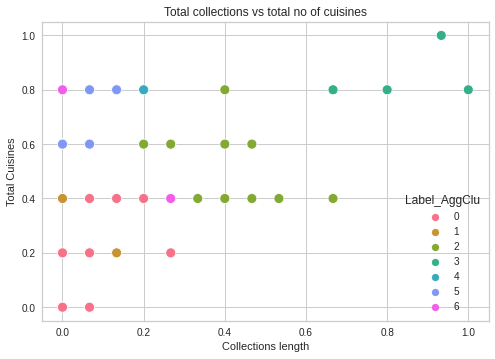

In [73]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',
                y = 'Total Cuisines',
                palette = sns.color_palette("husl",7),
                hue="Label_AggClu",
                legend='full',
                data = Y_predicted_clusters ,
                s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

## **Dbscan Clustering**

In [74]:
# define the model
model = DBSCAN(eps=0.15, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_DBscan"] = yhat
silhouette_scores_df.loc[2] = ['DBscan Clustering',len(clusters),score]

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

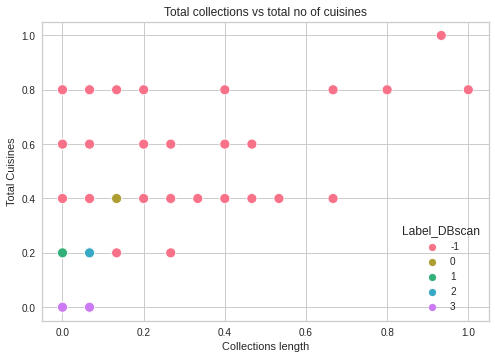

In [75]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',
                y = 'Total Cuisines',
                palette = sns.color_palette("husl",len(clusters)),hue="Label_DBscan",
                legend='full',
                data = Y_predicted_clusters ,
                s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

# **Step 9: Sentimental analysis**

In [76]:
rvw_df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_Reviews,no_of_Followers,Date,Hour,day,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,3.0,2.0,2019-05-24,21,Friday,May,2019


In [77]:
# Considering only those columns whihc are needed for the analysis
sent_df = rvw_df[['Review','Rating']]

In [78]:
# Null values
sent_df.isna().sum()

Review    0
Rating    0
dtype: int64

In [79]:
sent_df['Rating'].value_counts()

5.0    3826
4.0    2374
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [80]:
sent_df.shape

(9955, 2)

In [81]:
# converting the statements in reviews to lower alphabets
sent_df['Review'] = sent_df['Review'].str.lower()
sent_df.head()

,Review,Rating
0,"the ambience was good, food was quite good . h...",5.0
1,ambience is too good for a pleasant evening. s...,5.0
2,a must try.. great food great ambience. thnx f...,5.0
3,soumen das and arun was a great guy. only beca...,5.0
4,food is good.we ordered kodi drumsticks and ba...,5.0


In [82]:
# cleaning the dataset by removing the punctuations and all
#To remove emoji
def remove_Emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#to remove ratings along with \n
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating) #using regx
  rating=re.sub(r'(\n+)','',rating) #removes \n
  return rating

#to remove numbers 
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

#to remove punctuations and special characters
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc

#to remove [] brackets ''' quotes 
def clean_text(text):
    '''remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub(r'', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[''""...]', '', text)
    return text

#to remove stop words
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sent_df['Review']=sent_df['Review'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))

#to remove multiple spaces
sent_df['Review'] =sent_df['Review'].apply(lambda x: " ".join(x.split()))

sent_df['Review'] = sent_df['Review'].apply(lambda x:remove_Emoji(x))
sent_df['Review'] = sent_df['Review'].apply(lambda x:remove_rating(x))
sent_df['Review'] = sent_df['Review'].apply(lambda x:remove_number(x))
sent_df['Review'] = sent_df['Review'].apply(text_process)
sent_df['Review'] = sent_df['Review'].apply(lambda x:clean_text(x) )

In [83]:
#Convert short forms
sent_df['Review']=sent_df['Review'].apply(lambda x:contractions.fix(x))

In [84]:
#Converting word to its root form
!python -m spacy download en_core_web_sm
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-30 10:58:07.485372: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 23.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [85]:
#Lemmatization
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

sent_df['Review']=sent_df['Review'].apply(lambda x:lemmatization_(x))

In [86]:
#Rarely used words and word count
word=' '.join(sent_df['Review']).split()
words_df = pd.Series(word)

In [87]:
top_10_words = words_df.value_counts()[0:10]
least_10_words = words_df.value_counts(ascending=True)[0:10]

In [88]:
top_10_words

good        8211
food        6540
place       6004
order       3567
service     3229
chicken     3040
taste       2919
not         2385
ambience    2042
try         2026
dtype: int64

In [89]:
#Removing words which are rarely used 
def remove_rarely_used_words(review):
  review=" ".join([i for i in review.split() if len(i)>3])
  return review

sent_df['Review'] = sent_df['Review'].apply(lambda x:remove_rarely_used_words(x))

In [90]:
#Creating 2 categories based on the rating 
def sentiment(rating):
  if rating >=3.5:
    return 1 
    # positive statement
  else:
    return 0
    # negative

In [91]:
sent_df['sentiment'] = sent_df['Rating'].apply(lambda x:sentiment(x))
sent_df.head(5)

,Review,Rating,sentiment
0,ambience good food good saturday lunch cost ef...,5.0,1
1,ambience good pleasant evening service prompt ...,5.0,1
2,great food great ambience thnx service pradeep...,5.0,1
3,soumen arun great behavior sincerety good food...,5.0,1
4,food goodwe order kodi drumstick basket mutton...,5.0,1


In [92]:
# creating x and y varibles for independent and dependent variable
X = sent_df['Review']
y = sent_df['sentiment']

# **Step 10: Model Building**

## **Train and Test Split**


In [93]:
# spliting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [94]:
# creating topkens for text data
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)

X_test=vectorizer.transform(X_test)

In [95]:
# Creating class for all models 
ran = RandomForestClassifier(n_estimators=90)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
xgb = XGBClassifier()

In [96]:
models = {"Random forest" : ran,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "XGboost" : xgb
         }         
scores = { }

In [97]:
#Fitting the models
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [98]:
#Creating a datafframe which holds the accuracy score for all models
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.861390
Logistic Regression,0.859381
Random forest,0.840498
XGboost,0.822419


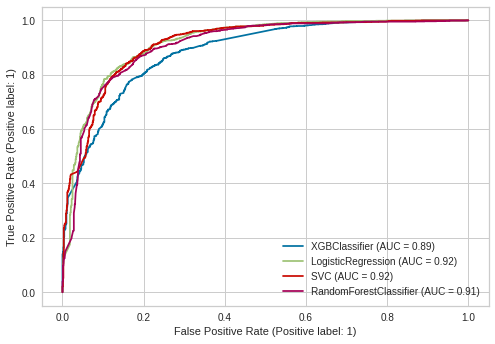

In [99]:
#ROC curve
disp = plot_roc_curve(xgb, X_test, y_test)
plt.rcParams['figure.figsize'] = (16, 10)
plot_roc_curve(lgr,X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm,X_test, y_test, ax = disp.ax_)
plot_roc_curve(ran,X_test, y_test, ax = disp.ax_) 

In [100]:
models = [['XGboost', XGBClassifier()],['Logistic Regression', LogisticRegression(solver='liblinear')],['SVM', SVC(random_state=6)]]

In [101]:
#Creating a dataframe which holds all details of evaluation metric
model_1_data = []
for name,model in models:
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [102]:
model_1_data = pd.DataFrame(model_1_data)
model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

,Name,Train_accuracy,Test_accuracy,Recall,F1_Score
0,XGboost,0.835521,0.822419,0.793269,0.749149
1,Logistic Regression,0.900482,0.859381,0.852798,0.800228
2,SVM,0.968658,0.861390,0.870722,0.799302


In [103]:
classifiers = [XGBClassifier(),LogisticRegression(solver='liblinear'),RandomForestClassifier(n_estimators=90),SVC(random_state=6)]
classifiers_names = ['XGboost','Logistic Regression','Random Forest','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

In [104]:
diff = np.array(training)-np.array(testing)

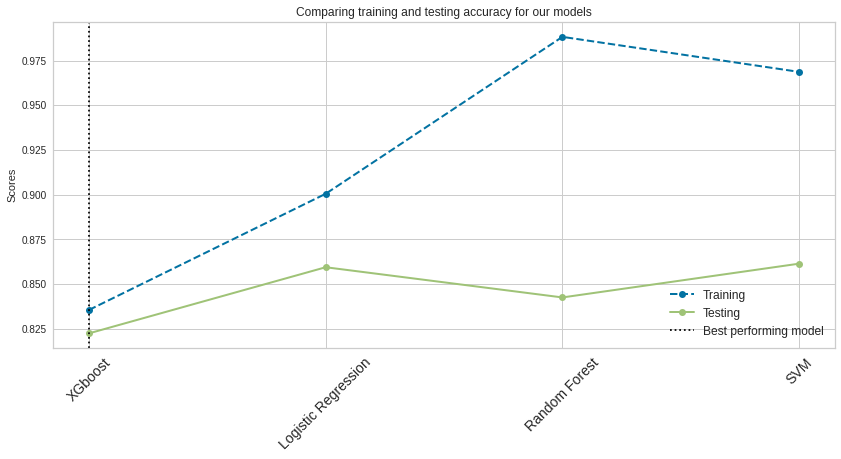

In [105]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can see that our models are quite overfitting. But if we consider those models with less overfitting and more than 80% accuracy then it would be

(1)XGboost

(2) Logistic regression

(3) LGBM and

(4) SVM

Now we do the hyperparameter tuning for these models and we choose the best amongst these.

# **Step 11: Hyperparameter Tuning**

## **XGB Classifier**

In [106]:
xgbc = XGBClassifier()

# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
  
# Instantiating Decision Tree classifier
xgb_cv=GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
    
xgb_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

#Finding the best fit
xgb_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
Best score is 0.8373955802099441


XGBClassifier(criterion='entropy', max_depth=15, n_estimators=150)

In [107]:
xgb_pred = xgb_cv.predict(X_test)
print(classification_report(y_test,xgb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8208    0.7484    0.7829       930
           1     0.8574    0.9025    0.8794      1559

    accuracy                         0.8449      2489
   macro avg     0.8391    0.8254    0.8311      2489
weighted avg     0.8437    0.8449    0.8433      2489



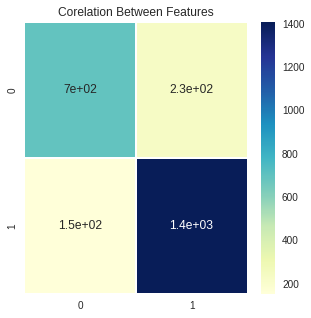

In [108]:
conf_mat = confusion_matrix(y_test, xgb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

## **Logistic Regression**

In [109]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8465030472414329


In [110]:
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8328    0.7710    0.8007       930
           1     0.8692    0.9076    0.8880      1559

    accuracy                         0.8566      2489
   macro avg     0.8510    0.8393    0.8443      2489
weighted avg     0.8556    0.8566    0.8554      2489



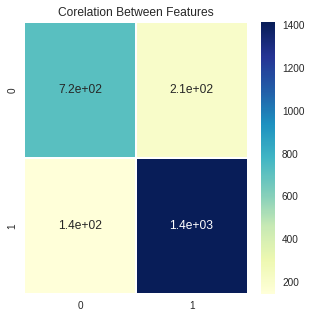

In [111]:
conf_mat = confusion_matrix(y_test, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

We can observe that Logistic regression is working good. Its accuracy and recall is more when compared to other models. So we conclude that that Logistic regression is the best model in this sentimental analysis.

# **Step 12: Conclusion:**

*   The most typical food to be found in restaurants is **North Indian** cuisine.
*   The most **expensive** restaurant is **Collage - Hyatt Hyderabad Gachibowli**.

*   The most economical dining establishments are **Amul** and **Mohammedia Shawarma.**

*   The top eateries include Buddies, Bar & BBQ, B-Dubs, and **AB's - Absolute Barbecues**.

*   The most frequent word in sentiments of extreme **positivity** is **good**.

*   The most frequent word in sentiments of extreme **Negatively** is **worst**.

*   Restaurants **Arena Elven** and **Banana Leaf Multicuisine** have received the most negative comments.

*   It is crucial to separate the restaurants with the lowest rating toorder to enhance the overall customer experience, according to the results of a simple cost-benefit analysis on Zomato conducted with a few assumptions as the foundation for the little business expertise that could be acquired. These establishments were little eateries or ones that charged a lot for the meals they served. More effort should be put into advertising, and reviews, particularly for these eateries, should be examined and improved. It appears that Mohammedia Shawarma is lucrative.

*   The reviews were subjected to sentiment analysis, and a model was developed to distinguish between good and negative attitudes. Logistic regression performs better in terms of lowering False positives, although having a greater rate of false negatives. As a result, Logistic Regression appears to be punishing False Positives more harshly as desired.

*   Ratings have to be gathered according to categories, such as packaging, delivery, taste, excellence, amount, and service. This would aid in focusing on particular fields that are falling behind.

*   The score of the XGB Classifier after hyperparameter tuning is 83%. Conversely, logistic regression is effective, scoring 84%.



